## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [23]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

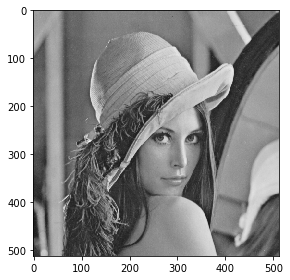

In [37]:

img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
io.imshow(lena_im)
plt.show()

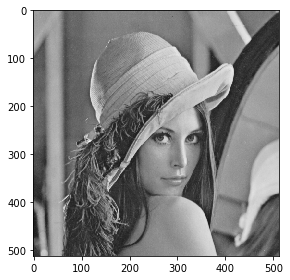

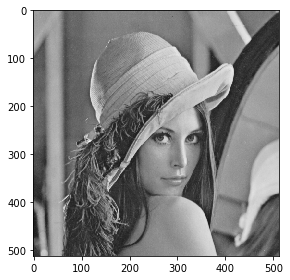

In [45]:
Ib = misc.imresize(lena_im, 0.5, interp='bilinear')
io.imshow(lena_im)
plt.show()



Ib = misc.imresize(lena_im, 0.5, interp='bicubic')
io.imshow(lena_im)
plt.show()

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


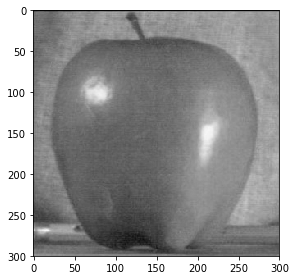

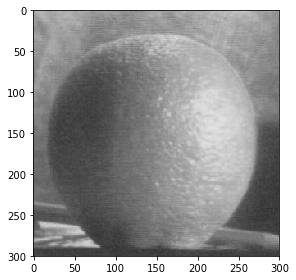

In [58]:
img_path = './images/'
img_name = 'apple.jpeg'
apple_gray = io.imread(img_path.__add__(img_name), as_grey=True)
io.imshow(apple_gray)
plt.show()

img_path = './images/'
img_name = 'orange.jpeg'
orange_gray = io.imread(img_path.__add__(img_name), as_grey=True)
io.imshow(orange_gray)
plt.show()

def simple_blend(img1,img2):
    
    img = np.zeros(np.shape(img1))*2
    for  i range(0,img2,shaoe[0]-1)
